<h1>Análisis de Diabetes</h1>

<h2>Importamos las librearías que usamos en el análisis</h2>

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [445]:
import warnings
warnings.filterwarnings("ignore")

<h2>Importamos el dataset</h2>

In [174]:
df = pd.read_csv('acamica_diabetes.csv')

In [175]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [176]:
df.shape

(768, 9)

In [177]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [178]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h2>Columnas</h2>
<ul>
    <li>Pregnancies: Cantidad de veces que quedó embarazada</li>
    <li>Glucose: Nivel de glucosa concentrada en la sangre durante un test de tolerancia de dos horas.
        Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas) 
        Concentración de glucosa en la sangre. Un nivel de glucosa en sangre en ayuno normal es de menos de 100 mg/dl Una persona con prediabetes tiene un nivel de glucosa en sangre en ayuno de entre 100 y 125 mg/dl. Si los niveles de glucosa en sangre se elevan a 126 mg/dl o más, la persona se diagnostica con diabetes.</li>
    <li>BloodPressure: Presión arterial diastólica en mm Hg.
        Una presión sistólica normal está por debajo de los  120, entre 120-129 es elevada, entre 130-139 es la fase 1 de hipertensión, más de 140 es la etapa 2 de hipertensión y por último si supera los 180 es una hipertensión crítica.</li>
    <li>SkinThickness: Grosor de los pliegos de la piel en el triceps. Lo normal sería un valor superior a 10mm.</li>
    <li>Insulin: Insulina ensérica en la sangre.
        Los valores normales oscilan entre 60-100mg/dl y 140 mg/dl o menos después de las comidas.</li>
    <li>BMI: Índice de masa corporal. Menor a 18.5 es bajo. between 18.5 and 24.9 es el rango normal. Entre 25 and 29.9 es sobrepeso.</li>
    <li>DiabetesPedigreeFunction: posibilidad de diabetes según herencia y genética.</li>   
    <li>Age: Edad</li>
    <li>Outcome: Si el paciente es diabético o no. Target.</li>
</ul>    

In [179]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<p>El set de datos no presenta valores nulos</p>

<h5>Pregnancies</h5>

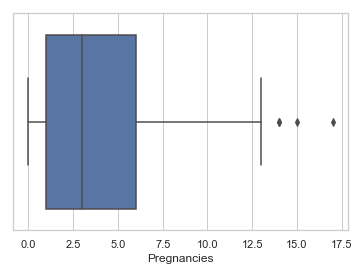

In [180]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Pregnancies"])

In [181]:
print("Cantidad de registros con más de 12 embarazos: " + str(len(df[df.Pregnancies > 12])))
df[df.Pregnancies > 12]

Cantidad de registros con más de 12 embarazos: 14


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
28,13,145,82,19,110,22.2,0.245,57,0
72,13,126,90,0,0,43.4,0.583,42,1
86,13,106,72,54,0,36.6,0.178,45,0
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
274,13,106,70,0,0,34.2,0.251,52,0
298,14,100,78,25,184,36.6,0.412,46,1
323,13,152,90,33,29,26.8,0.731,43,1
357,13,129,0,30,0,39.9,0.569,44,1
455,14,175,62,30,0,33.6,0.212,38,1


<p>A pesar de haber otuliers, se ven valores coherentes para el resto de las varialbes, incluyendo targets positivos, lo que puede llegar a distorsionar los resultados del modelo</p>
<p>Se observan varios valores en 0 para dos variables determinadas, que serán analizadas por separado.</p>

<h5>Glucose</h5>

In [182]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [183]:
df[df.Glucose!=0].Glucose.describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

In [184]:
df[df.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


C:\Users\Dicsys\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


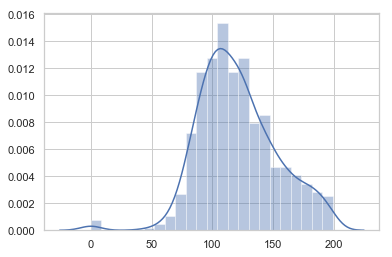

In [185]:
sns.distplot([df['Glucose']])

In [186]:
imp_gl = SimpleImputer(missing_values=0, strategy='mean')
imp_gl.fit(df[['Glucose']])
df["Glucose"] = imp_gl.transform(df[['Glucose']])
df.Glucose.describe()

count    768.000000
mean     121.686763
std       30.435949
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

C:\Users\Dicsys\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


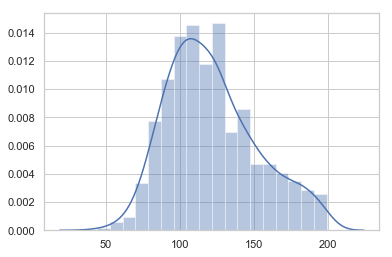

In [187]:
sns.distplot([df['Glucose']])

<h5>Blood Pressure</h5>

In [188]:
df.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [189]:
len(df[df.BloodPressure==0])

35

In [190]:
df[df.BloodPressure!=0].BloodPressure.describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

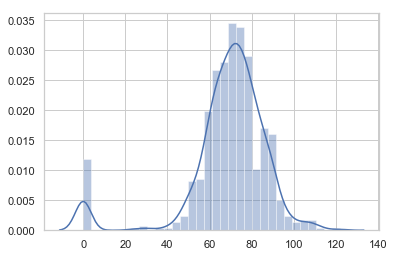

In [191]:
sns.distplot([df.BloodPressure])

In [192]:
df[df.BloodPressure==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


In [193]:
len(df[(df.BloodPressure==0) & (df.SkinThickness==0) & (df.Insulin==0)])

33

In [194]:
df = df.drop(df[(df.BloodPressure==0) & (df.SkinThickness==0) & (df.Insulin==0)].index)

In [195]:
len(df)

735

In [196]:
df[df.BloodPressure==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
172,2,87.0,0,23,0,28.9,0.773,25,0
357,13,129.0,0,30,0,39.9,0.569,44,1


In [197]:
imp_bl = SimpleImputer(missing_values=0, strategy='mean')
imp_bl.fit(df[['BloodPressure']])
df["BloodPressure"] = imp_bl.transform(df[['BloodPressure']])
df.BloodPressure.describe()

count    735.000000
mean      72.405184
std       12.365277
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

C:\Users\Dicsys\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


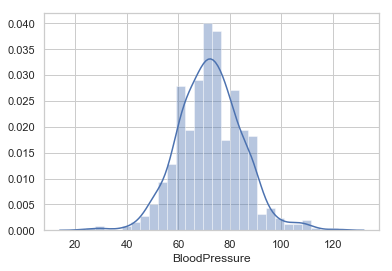

In [198]:
sns.distplot(df.BloodPressure)

<h5>SkinThickness</h5>

In [199]:
len(df[df.SkinThickness==0])

194

In [200]:
df.SkinThickness.describe()

count    735.000000
mean      21.458503
std       15.687622
min        0.000000
25%        0.000000
50%       24.000000
75%       33.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [202]:
np.percentile(df.SkinThickness,99)

51.65999999999997

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


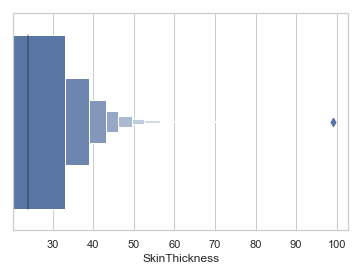

In [204]:
ax = sns.boxenplot(x=df["SkinThickness"])

In [208]:
df = df.drop(df[df.SkinThickness==99].index)

In [209]:
df.SkinThickness.describe()

count    734.000000
mean      21.352861
std       15.434481
min        0.000000
25%        0.000000
50%       24.000000
75%       33.000000
max       63.000000
Name: SkinThickness, dtype: float64

C:\Users\Dicsys\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


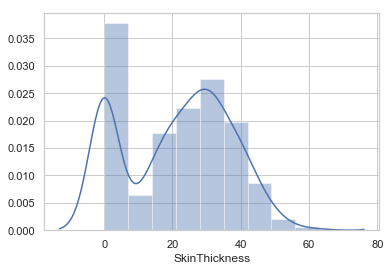

In [210]:
sns.distplot(df.SkinThickness)

In [215]:
imp_st = SimpleImputer(missing_values=0, strategy='mean')
imp_st.fit(df[['SkinThickness']])
df["SkinThickness"] = imp_st.transform(df[['SkinThickness']])
df.SkinThickness.describe()

count    734.000000
mean      29.024074
std        8.613791
min        7.000000
25%       24.250000
50%       29.024074
75%       33.000000
max       63.000000
Name: SkinThickness, dtype: float64

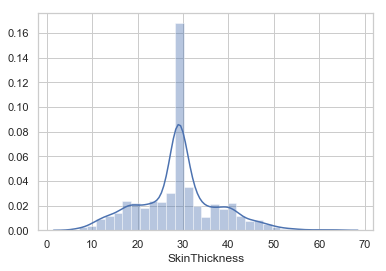

In [217]:
sns.distplot(df.SkinThickness)

<h5>Insuline</h5>

In [221]:
len(df[df.Insulin==0])/len(df)

0.46321525885558584

C:\Users\Dicsys\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


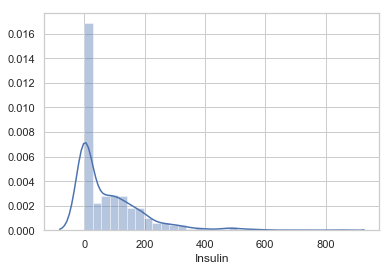

In [222]:
sns.distplot(df.Insulin)

In [228]:
df.drop(columns=['Insulin'],inplace=True)

In [229]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<h5>BMI</h5>

In [230]:
df.BMI.describe()

count    734.000000
mean      32.295232
std        7.272544
min        0.000000
25%       27.400000
50%       32.250000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [231]:
df[df.BMI==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,29.024074,0.0,0.232,54,1
145,0,102.0,75.0,23.000000,0.0,0.572,21,0
371,0,118.0,64.0,23.000000,0.0,1.731,21,0
684,5,136.0,82.0,29.024074,0.0,0.640,69,0


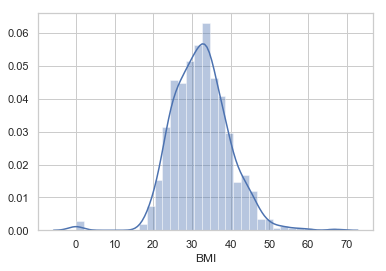

In [233]:
sns.distplot(df.BMI)

In [234]:
imp_bmi = SimpleImputer(missing_values=0, strategy='mean')
imp_bmi.fit(df[['BMI']])
df["BMI"] = imp_bmi.transform(df[['BMI']])
df.BMI.describe()

count    734.000000
mean      32.472192
std        6.867833
min       18.200000
25%       27.500000
50%       32.400000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

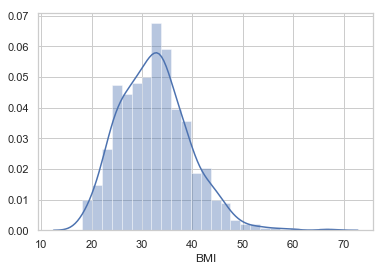

In [236]:
sns.distplot(df.BMI)

<h5>DiabetesPedigreeFunction</h5>

In [238]:
df.DiabetesPedigreeFunction.describe()

count    734.000000
mean       0.476257
std        0.334129
min        0.078000
25%        0.245000
50%        0.380000
75%        0.630500
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [244]:
np.percentile(df.DiabetesPedigreeFunction,92)

0.95536

C:\Users\Dicsys\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


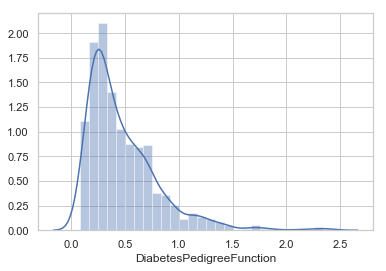

In [246]:
sns.distplot(df.DiabetesPedigreeFunction)

<h5>Age</h5>

In [248]:
df.Age.describe()

count    734.000000
mean      33.325613
std       11.792151
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

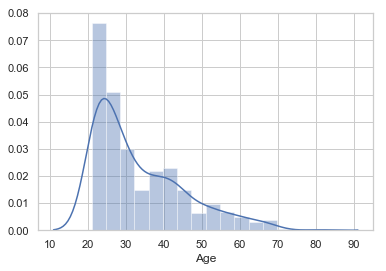

In [250]:
sns.distplot(df.Age)

<h2>Correlaciones</h2>

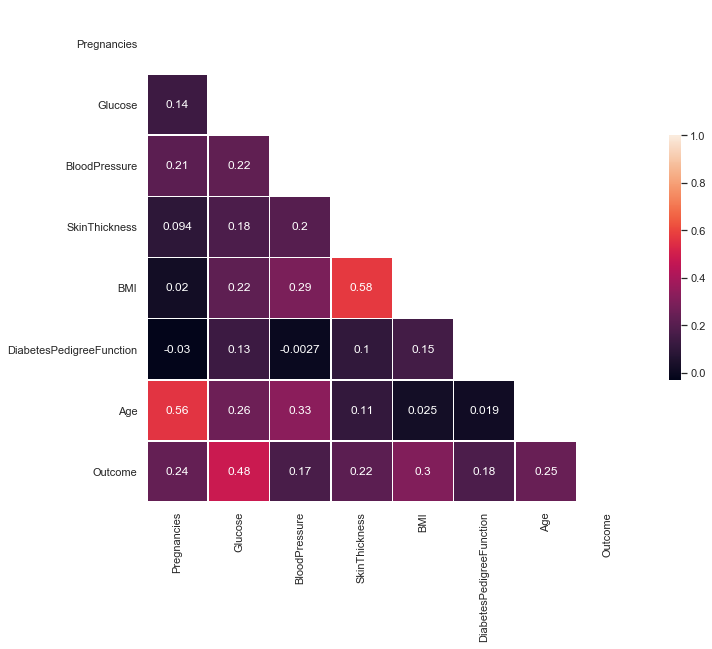

In [290]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#           square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True);}
sns.heatmap(corr,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            annot=True);

In [300]:
df.shape

(734, 8)

In [299]:
df.groupby(df.Outcome).Outcome.count()

Outcome
0    482
1    252
Name: Outcome, dtype: int64

In [338]:
porc_pos = '%.2f'%((len(df[df.Outcome==1])/len(df))*100)
porc_neg = '%.2f'%((len(df[df.Outcome==0])/len(df))*100)

print("Porcentaje de casos positivos: " + str(porc_pos) + "%")
print("Porcentaje de casos negativos: " + str(porc_neg) + "%")

Porcentaje de casos positivos: 34.33%
Porcentaje de casos negativos: 65.67%


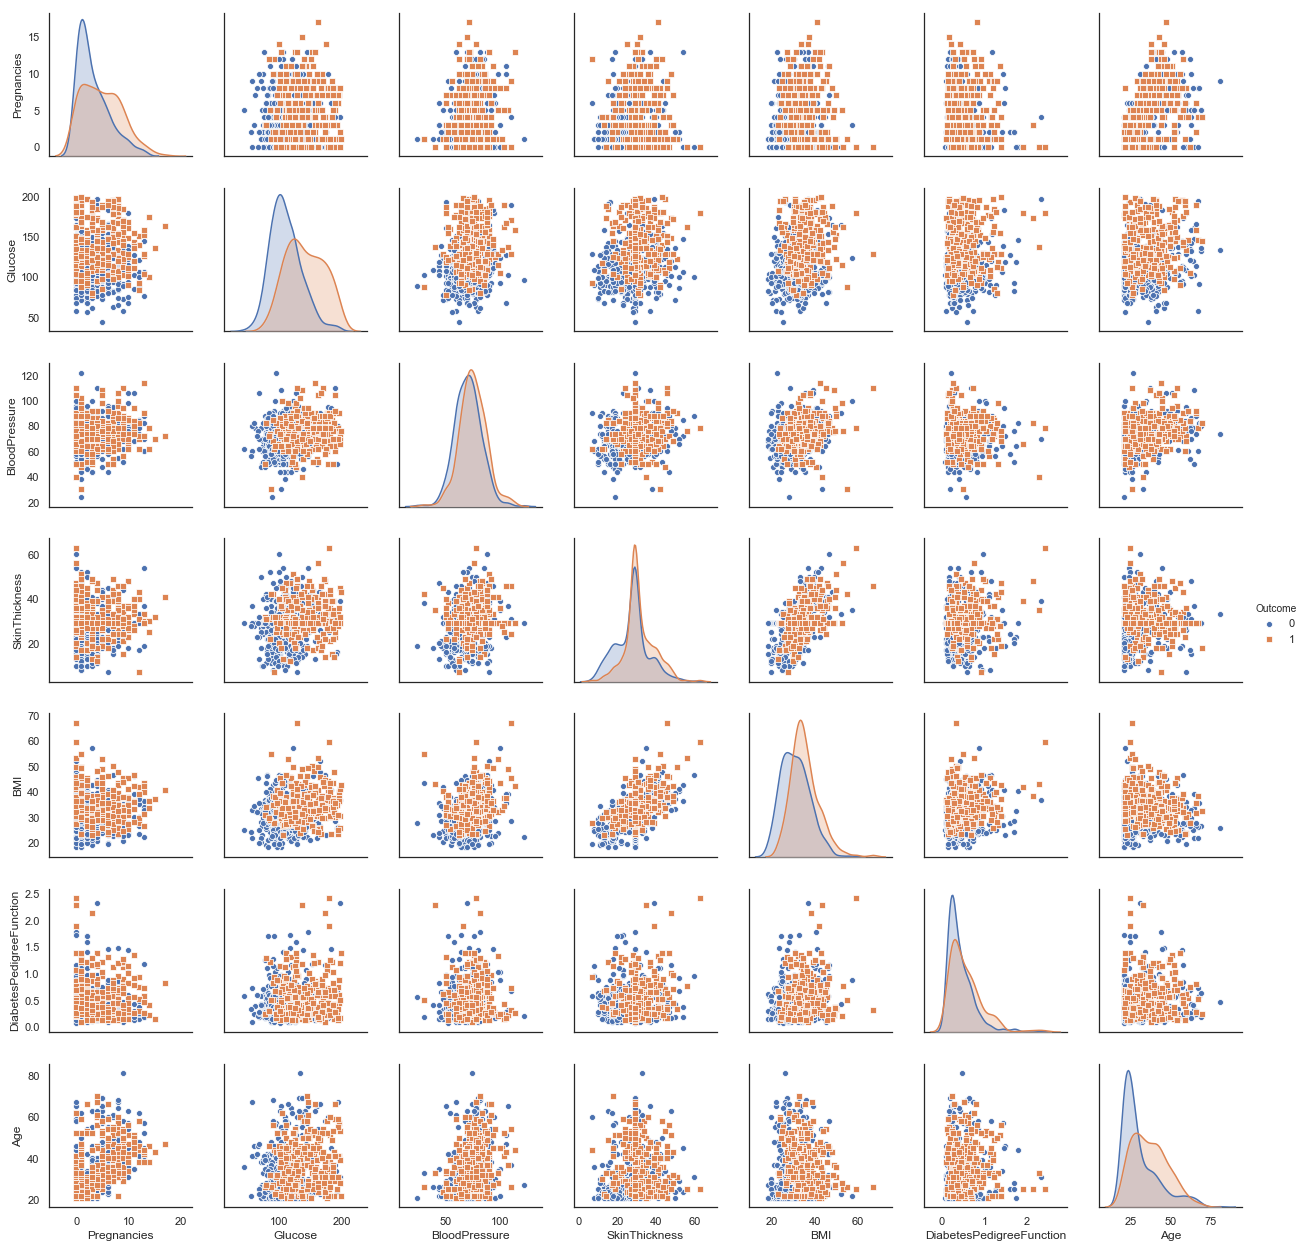

In [319]:
sns.pairplot(df, hue='Outcome', vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'], markers=["o", "s"]);

In [407]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df.Outcome

In [408]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [449]:
#rfc = RandomForestClassifier(n_estimators=200, random_state=0)

#from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

modelos = []
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('LR', LogisticRegression()))
modelos.append(('DT', DecisionTreeClassifier()))
modelos.append(('RF', RandomForestClassifier()))
modelos.append(('GB', GradientBoostingClassifier()))
modelos.append(('ABC', AdaBoostClassifier()))


In [450]:
nombres = []
scores = []

for nombre, modelo in modelos:
    
    kfold = KFold(n_splits=7, random_state=10) 
    score = cross_val_score(modelo, X, y, cv=kfold, scoring='accuracy').mean()
    
    nombres.append(nombre)
    scores.append(score)


In [452]:
kf_cross_val = pd.DataFrame({'Nombre': nombres, 'Score': scores})
kf_cross_val

,Nombre,Score
0,KNN,0.752067
1,LR,0.760217
2,DT,0.677145
3,RF,0.728872
4,GB,0.761578
5,ABC,0.758870


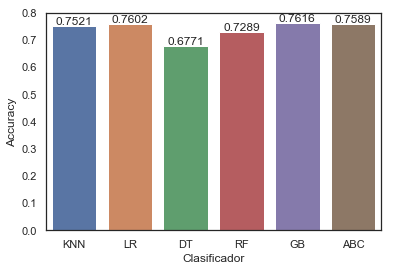

In [461]:
axis = sns.barplot(x = 'Nombre', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Clasificador', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [471]:
from sklearn.model_selection import GridSearchCV
#from sklearn.tree import DecisionTreeRegressor

knn = KNeighborsClassifier()
param_knn = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]


knn_grid_search = GridSearchCV(knn,
                               param_knn,
                               cv=10,
                               scoring='neg_mean_squared_error', 
                               return_train_score=True)
knn_grid_search.fit(X, y)    
knn_grid_search.best_params_

{'n_neighbors': 10}

In [474]:
lr = LogisticRegression()
param_lr = [{}]


lr_grid_search = GridSearchCV(lr,
                               param_lr,
                               cv=10,
                               scoring='neg_mean_squared_error', 
                               return_train_score=True)
lr_grid_search.fit(X, y)    
lr_grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [485]:
rf = RandomForestClassifier()

param_rf = {'n_estimators':[10, 40, 20],
            'max_depth':[3, 7, None],
            'min_samples_split':[2, 3, 10],
            'criterion': ["gini", "entropy"]}

rf_grid_search = GridSearchCV(rf,
                              param_rf,
                              cv=5,
                              scoring='neg_mean_squared_error', 
                              return_train_score=True)
rf_grid_search.fit(X, y)    
rf_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 3,
 'n_estimators': 10}

In [492]:
gb = GradientBoostingClassifier()

param_gb = {}

gb_grid_search = GridSearchCV(gb,
                              param_gb,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

gb_grid_search.fit(X, y)    
gb_grid_search.best_estimator_


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [486]:
abc = AdaBoostClassifier()

param_abc = {'n_estimators': [5, 20, 30]}

abc_grid_search = GridSearchCV(abc,
                               param_abc,
                               cv=5,
                               scoring='roc_auc',
                               n_jobs=-1)
abc_grid_search.fit(X, y)    
abc_grid_search.best_params_

{'n_estimators': 20}

In [520]:
modelos = []
modelos.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
modelos.append(('LR', LogisticRegression(C=1.0,penalty='l2',tol=0.0001)))
modelos.append(('RF', RandomForestClassifier(criterion='gini',max_depth=7,min_samples_split=3,n_estimators=10)))
modelos.append(('GB', GradientBoostingClassifier(criterion='friedman_mse',loss='deviance')))
modelos.append(('ABC', AdaBoostClassifier(n_estimators=20)))

In [522]:
kf_cross_val2 = pd.DataFrame({'Nombre': nombres, 'Score': scores})
kf_cross_val2

,Nombre,Score
0,KNN,0.762991
1,LR,0.760217
2,RF,0.754788
3,GB,0.761578
4,ABC,0.753401


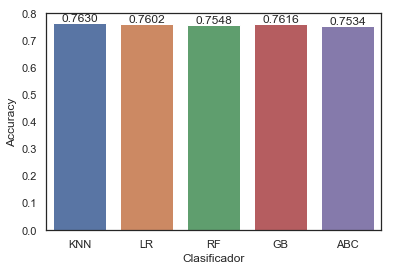

In [523]:
axis = sns.barplot(x = 'Nombre', y = 'Score', data = kf_cross_val2)
axis.set(xlabel='Clasificador', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [524]:
import numpy as np
import itertools
import matplotlib.pylab as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   """
   This function prints and plots the confusion matrix.
   Normalization can be applied by setting `normalize=True`.
   """
   if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
   else:
       print('Confusion matrix, without normalization')

   print(cm)

   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)

   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
   plt.show()

In [526]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(knn, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

In [527]:
conf_mat

array([[407,  75],
       [105, 147]], dtype=int64)

Confusion matrix, without normalization
[[407  75]
 [105 147]]


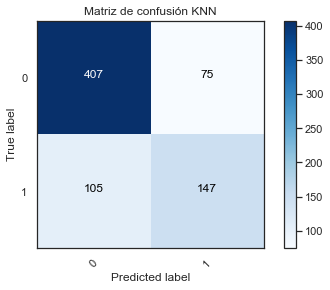

In [528]:
class_names=['0', '1']
plot_confusion_matrix(conf_mat,
                      classes=class_names,
                      title='Matriz de confusión KNN')

TN: 407
FP: 75
FN: 105
TP: 147

Confusion matrix, without normalization
[[410  72]
 [119 133]]


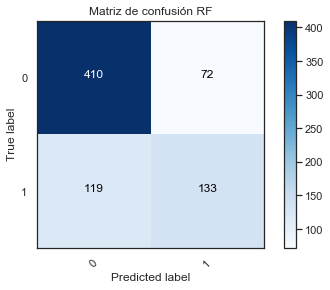

In [529]:
y_pred = cross_val_predict(rf, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
plot_confusion_matrix(conf_mat,
                      classes=class_names,
                      title='Matriz de confusión RF')

Confusion matrix, without normalization
[[428  54]
 [112 140]]


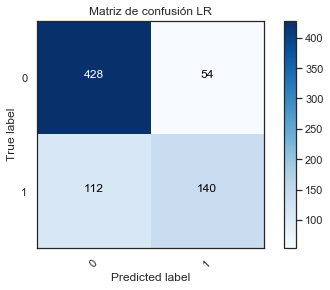

In [530]:
y_pred = cross_val_predict(lr, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
plot_confusion_matrix(conf_mat,
                      classes=class_names,
                      title='Matriz de confusión LR')

Confusion matrix, without normalization
[[406  76]
 [ 97 155]]


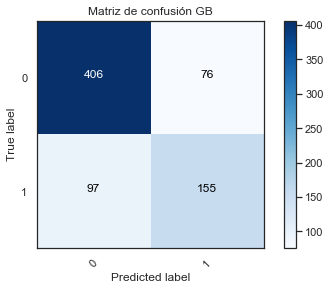

In [531]:
y_pred = cross_val_predict(gb, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
plot_confusion_matrix(conf_mat,
                      classes=class_names,
                      title='Matriz de confusión GB')

Confusion matrix, without normalization
[[406  76]
 [102 150]]


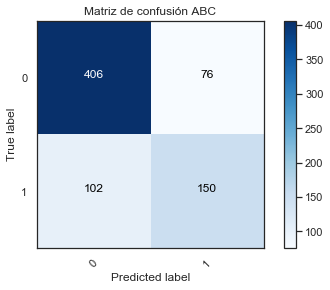

In [532]:
y_pred = cross_val_predict(abc, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
plot_confusion_matrix(conf_mat,
                      classes=class_names,
                      title='Matriz de confusión ABC')